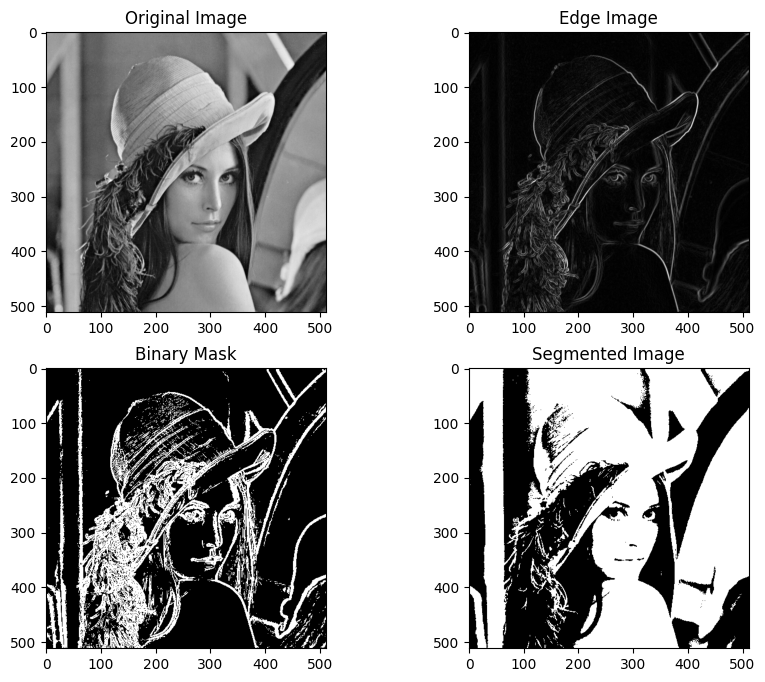

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_edge_image(img, method='gradient'):
    if method == 'gradient':
        # Use Sobel to compute gradient magnitude
        grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edge_img = np.sqrt(grad_x**2 + grad_y**2)
    elif method == 'laplacian':
        # Use Laplacian
        edge_img = cv2.Laplacian(img, cv2.CV_64F)
        edge_img = np.abs(edge_img)
    else:
        raise ValueError("Unknown method. Use 'gradient' or 'laplacian'.")
    return edge_img

def threshold_image(edge_img, T):
    # Apply threshold to get binary image
    _, binary_img = cv2.threshold(edge_img, T, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.astype(np.uint8)
    return binary_img

def get_strong_edge_pixels(img, binary_mask):
    # Use the binary image as a mask to select pixels from the original image
    strong_edges = img[binary_mask == 255]
    return strong_edges

def compute_histogram(strong_edges):
    # Compute the histogram of the strong edge points
    hist, bins = np.histogram(strong_edges, bins=256, range=(0, 256))
    return hist

def global_segmentation(img, hist):
    # Segment the image globally using histogram (e.g., Otsu's method)
    _, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_img

# Load and preprocess image
img = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute edge image (choose method: 'gradient' or 'laplacian')
edge_img = compute_edge_image(img, method='gradient')

# Step 2: Specify a threshold value T
T = 50  # You can adjust this value

# Step 3: Threshold the image using the threshold value T
binary_img = threshold_image(edge_img, T)

# Step 4: Get strong edge points from the original image
strong_edges = get_strong_edge_pixels(img, binary_img)

# Step 5: Compute a histogram of the strong edge points
hist = compute_histogram(strong_edges)

# Step 6: Use the histogram to segment the original image globally
segmented_img = global_segmentation(img, hist)

# Display results
plt.figure(figsize=(10,8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2,2,2), plt.imshow(edge_img, cmap='gray'), plt.title('Edge Image')
plt.subplot(2,2,3), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Mask')
plt.subplot(2,2,4), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
plt.show()
